### Reference Video

https://www.youtube.com/watch?v=M9Itm95JzL0&t=0s

In [80]:
import random

class Sentiment:
    NEGATIVE="NEGATIVE"
    NEUTRAL="NEUTRAL"
    POSITIVE="POSITIVE"


class Review:
    def __init__(self,text,score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score<=2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else:
            return Sentiment.POSITIVE
        
class ReviewContainer :
    def __init__(self,reviews):
        self.reviews = reviews
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        
        positive_shrunk = positive[0:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return[x.sentiment for x in self.reviews]

In [58]:
import json

file_name = "Books_small_10000.json"   #"AmazonReviews.json"

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        
        reviews.append(Review(review['reviewText'],review['overall']))
        
reviews[5].sentiment

'POSITIVE'

In [74]:
# Prep data

In [82]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(reviews, test_size=0.33, random_state=42)

train_container = ReviewContainer(train)
test_container = ReviewContainer(test)


len(cont.reviews)
#print("Sample training independent variable :: ",train[0].text)
#print("Sample training output variable :: ",train[0].sentiment)

872

In [86]:
train_container.evenly_distribute()
train_x = train_container.get_text()  
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x =  test_container.get_text()
test_y = test_container.get_sentiment()

print("Number of rows with positive sentiment :: ",train_y.count(Sentiment.POSITIVE))
print("Number of rows with negative sentiment :: ",train_y.count(Sentiment.NEGATIVE))

436
436
208
208
Number of rows with positive sentiment ::  436
Number of rows with negative sentiment ::  436


In [104]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Limitation of CountVectorizer gives equal weigtage to all words
#count_vect = CountVectorizer()
count_vect = TfidfVectorizer()
train_x_vectors = count_vect.fit_transform(train_x)
train_x_vectors.shape

test_x_vector = count_vect.transform(test_x)

In [105]:
print(train_x[0])
print(train_x_vectors[0].toarray())

Soup..Er..Myrtle. Ms. Myrlte was talking to her dog Mtlock when Bettie Easton called. She called about the M.E.L.O.N.S (the letters stand for Mature Elegant Ladies Open Nice Suggestion) The first time she told me about it, I said it made us sound like old hookers.Bettie had been right about one thing.Doris Phillips met me at the door of the Soup kitchen just tickld pink to have a little help.Myrtle had discovered a identity theft ring but did not know who was doing it.
[[0. 0. 0. ... 0. 0. 0.]]


## Classification

In [106]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

print(test_x[0])
test_x_vector[0]

clf_svm.predict(test_x_vector[0])

I just didn't get into it. If was interesting at first, but then it just seemed to ponder along. so


array(['NEGATIVE'], dtype='<U8')

In [107]:
pred_out = clf_svm.predict(test_x_vector)
pred_out[10]

'POSITIVE'

In [108]:
from sklearn.metrics import classification_report
target_names = [Sentiment.NEGATIVE , Sentiment.POSITIVE]  #  Sentiment.NEUTRAL ,
print(classification_report(test_y, pred_out, target_names=target_names))

              precision    recall  f1-score   support

    NEGATIVE       0.80      0.82      0.81       208
    POSITIVE       0.81      0.80      0.81       208

    accuracy                           0.81       416
   macro avg       0.81      0.81      0.81       416
weighted avg       0.81      0.81      0.81       416



### Decision Tree

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()

clf_dec.fit(train_x_vectors, train_y)

dec_out = clf_dec.predict(test_x_vector)
dec_out[10]

'POSITIVE'

### Naive bayes

In [110]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()

clf_nb.fit(train_x_vectors.toarray(), train_y)

nb_out = clf_nb.predict(test_x_vector.toarray())
nb_out[10]

'NEGATIVE'

### Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()

clf_log.fit(train_x_vectors, train_y)

log_out = clf_log.predict(test_x_vector)
log_out[10]

'POSITIVE'

# Evaluation

In [112]:
## Mean accuracy

print("Score for SVM model is :: ",clf_svm.score(test_x_vector, test_y))
print("Score for decision tree model is :: ",clf_dec.score(test_x_vector, test_y))
print("Score for Naive bayes model is :: ",clf_nb.score(test_x_vector.toarray(), test_y))
print("Score for logistic model is :: ",clf_log.score(test_x_vector, test_y))

Score for SVM model is ::  0.8076923076923077
Score for decision tree model is ::  0.6346153846153846
Score for Naive bayes model is ::  0.6610576923076923
Score for logistic model is ::  0.8052884615384616


In [113]:
## F score
from sklearn.metrics import f1_score

print("F-score for SVM :: ",f1_score(test_y,pred_out, average=None, labels=[Sentiment.POSITIVE,Sentiment.NEUTRAL,Sentiment.NEGATIVE]))
print("F-score for decision tree :: ",f1_score(test_y,dec_out, average=None, labels=[Sentiment.POSITIVE,Sentiment.NEUTRAL,Sentiment.NEGATIVE]))
print("F-score naive bayes :: ",f1_score(test_y,nb_out, average=None, labels=[Sentiment.POSITIVE,Sentiment.NEUTRAL,Sentiment.NEGATIVE]))
print("F-score logistic regression :: ",f1_score(test_y,log_out, average=None, labels=[Sentiment.POSITIVE,Sentiment.NEUTRAL,Sentiment.NEGATIVE]))

F-score for SVM ::  [0.80582524 0.         0.80952381]
F-score for decision tree ::  [0.62189055 0.         0.64651163]
F-score naive bayes ::  [0.65693431 0.         0.66508314]
F-score logistic regression ::  [0.80291971 0.         0.80760095]


C:\Users\Vijay S Chauhan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Vijay S Chauhan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Vijay S Chauhan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\Vijay S Chauhan\

In [71]:
import collections

#train_y.count(Sentiment.POSITIVE)
counter=collections.Counter(train_y)

print(counter)
# Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})

Counter({'POSITIVE': 5611, 'NEUTRAL': 653, 'NEGATIVE': 436})


In [102]:
test_set = ['I thoroughly enjoyed this, 5 stars', 'bad book do not buy','horrible waste of time']

new_test = count_vect.transform(test_set)

clf_svm.predict(new_test)

array(['POSITIVE', 'NEGATIVE', 'NEGATIVE'], dtype='<U8')

## Tuning our model(with Grid search)

In [119]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear','rbf'), 'C':(1,4,8,16,32)}

tuned_svm = svm.SVC()
clf = GridSearchCV(tuned_svm, parameters, cv=5)

clf.fit(train_x_vectors, train_y)

#log_out = clf_log.predict(test_x_vector)
#log_out[10]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [120]:
print("Score for Grid search model is :: ",clf.score(test_x_vector, test_y))

Score for Grid search model is ::  0.8197115384615384


# Saving model

In [122]:
import pickle

with open('./models/sentiment_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)

### Load model

In [123]:
with open('./models/sentiment_classifier.pkl', 'rb') as f:
    loaded_clf=pickle.load(f)

In [126]:
model_out = loaded_clf.predict(test_x_vector)

model_out[10]

'POSITIVE'

In [131]:
print(test_x[9])
model_out[9]

Put together a Greek fisherman/half assed detective named Socrates with some questionable characters and the recipe is funny and entertaining.


'POSITIVE'

<AxesSubplot:>

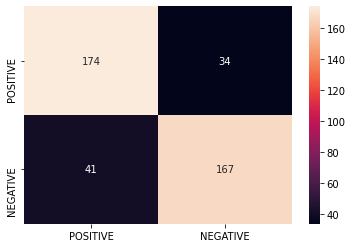

In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib as plt

labels = [Sentiment.POSITIVE, Sentiment.NEGATIVE]

cm = confusion_matrix(test_y, model_out, labels=labels)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

sn.heatmap(df_cm, annot=True, fmt='d')